In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy
from tqdm import tqdm
import h5py

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CsMv2
import calculation.SusceptibilitySimpv2 as Susceptv2
import settings.Constants as const

In [2]:
saddleFile = "h5_output_data/VT-space.hdf5"
shotFile = "h5_output_data/CurrentNoiseVT_results.hdf5"
    
##! Read data from the hdf5 file
with h5py.File(saddleFile, 'r') as f:
    domain = f['VTSpace/domain'][:]
    DRDataOne = f['VTSpace/DRDataOne'][:]
    DKDataOne = f['VTSpace/DKDataOne'][:]


with h5py.File(shotFile, 'r') as f:
    retardedNonIntZero = f['ShotNoise/retardedNonIntZero'][:]
    keldyshNonIntZero = f['ShotNoise/keldyshNonIntZero'][:]
    
    retardedNonIntOne = f['ShotNoise/retardedNonIntOne'][:]
    keldyshNonIntOne = f['ShotNoise/keldyshNonIntOne'][:]
    retardedIntOne = f['ShotNoise/retardedIntOne'][:]
    keldyshIntOne = f['ShotNoise/keldyshIntOne'][:]
    
    domainOne = f['ShotNoise/domainOne'][:]
    dominZero = f['ShotNoise/domainZero'][:]

In [3]:

retardedTotOne = retardedNonIntOne.real - 2*retardedIntOne.imag
keldyshTotOne = keldyshNonIntOne.real - 2*keldyshIntOne.imag

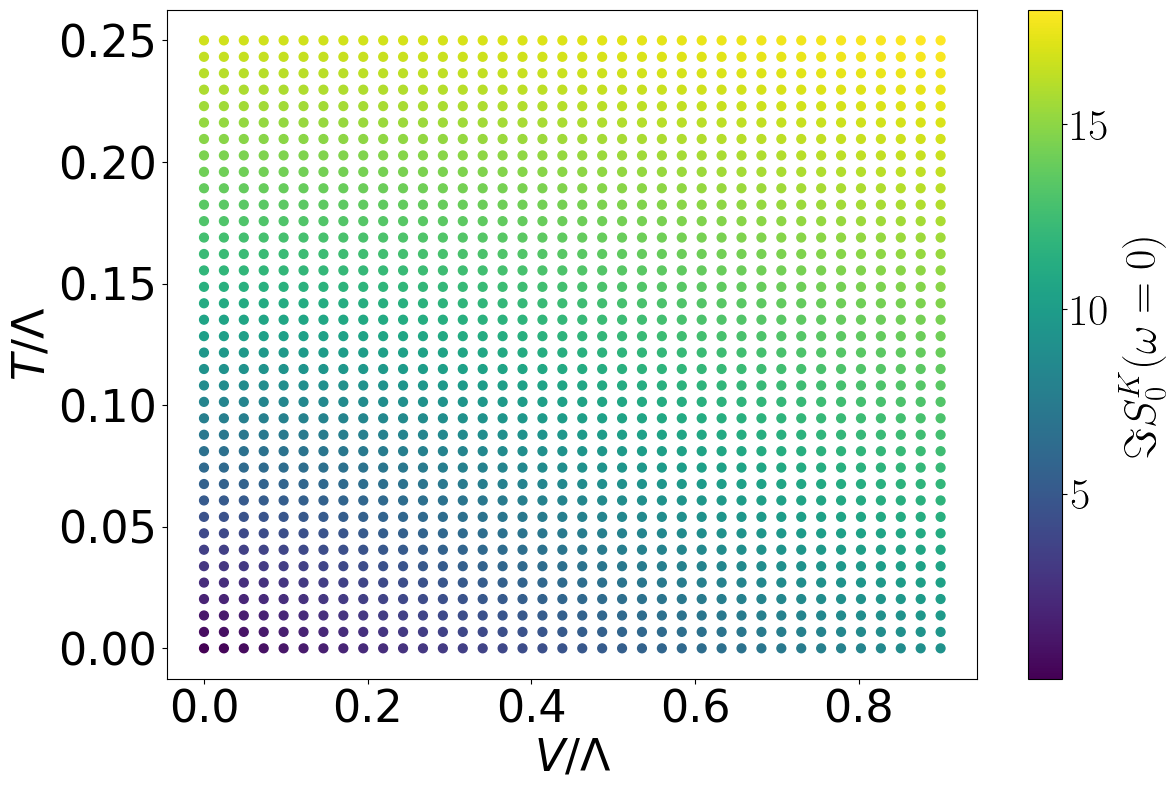

In [4]:

###* Keldysh NonInt Case

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshNonIntZero[:, 1].real

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_0^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK_NonInt_VT.png', bbox_inches='tight', dpi=600)



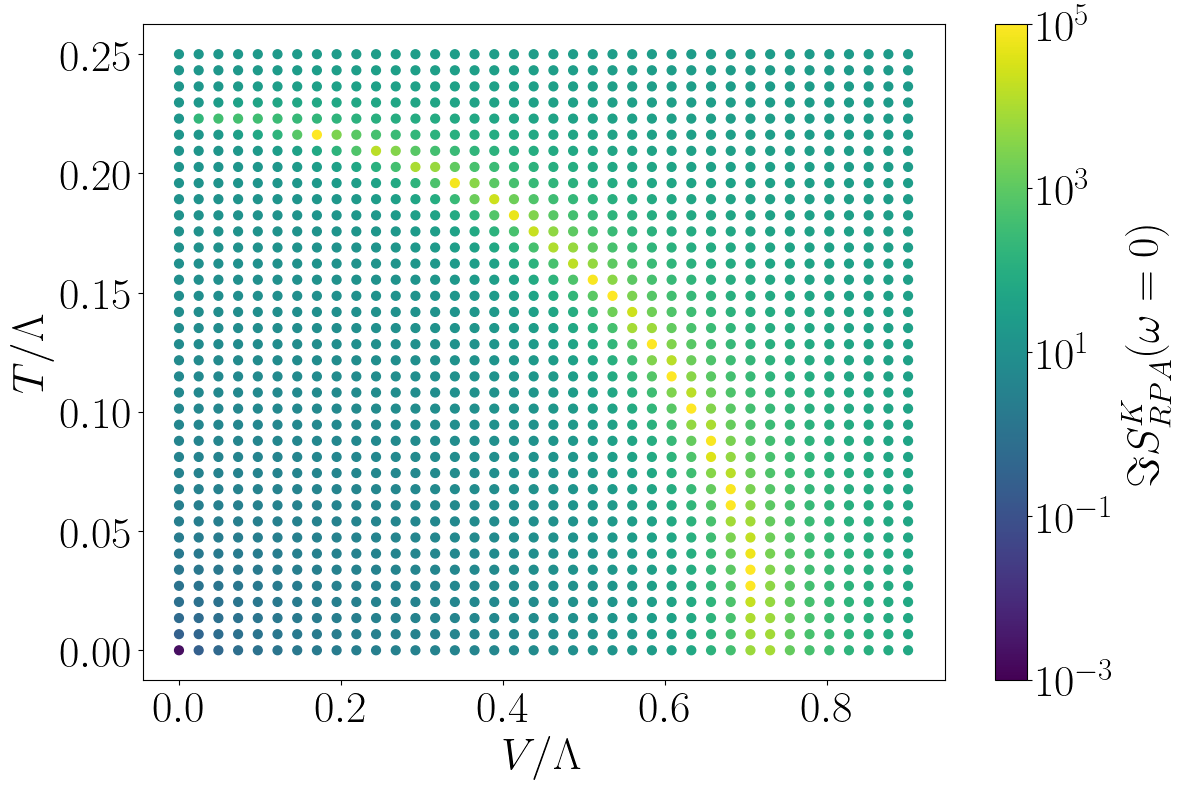

In [5]:

###* Keldysh RPA Case

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshTotOne[:, 1]

vmin = 1e-3
vmax = 1e5

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_{RPA}^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK_RPA_VT.png', bbox_inches='tight', dpi=600)


In [6]:

FauxPlusNonInt = retardedNonIntZero[:,2].real/keldyshNonIntZero[:,2].real
FauxMinusNonInt = retardedNonIntZero[:,0].real/keldyshNonIntZero[:,0].real
dFomegaNonInt = (FauxPlusNonInt - FauxMinusNonInt)/(2*2e-3)

FauxPlusTotal = retardedTotOne[:,2]/keldyshTotOne[:,2]
FauxMinusTotal = retardedTotOne[:,0]/keldyshTotOne[:,0]
dFomegaTotal = (FauxPlusTotal - FauxMinusTotal)/(2*2e-3)



In [7]:
### check plots

# plt.plot(0.5/dFomegaTotal/2)
# plt.yscale('log')

# # plt.plot(dFomegaNonInt)
# TeffNonInt = 0.5/dFomegaNonInt/2
# TeffNonInt[TeffNonInt < 1e-5] = 0.0
# plt.plot(TeffNonInt)
# # plt.yscale('log')



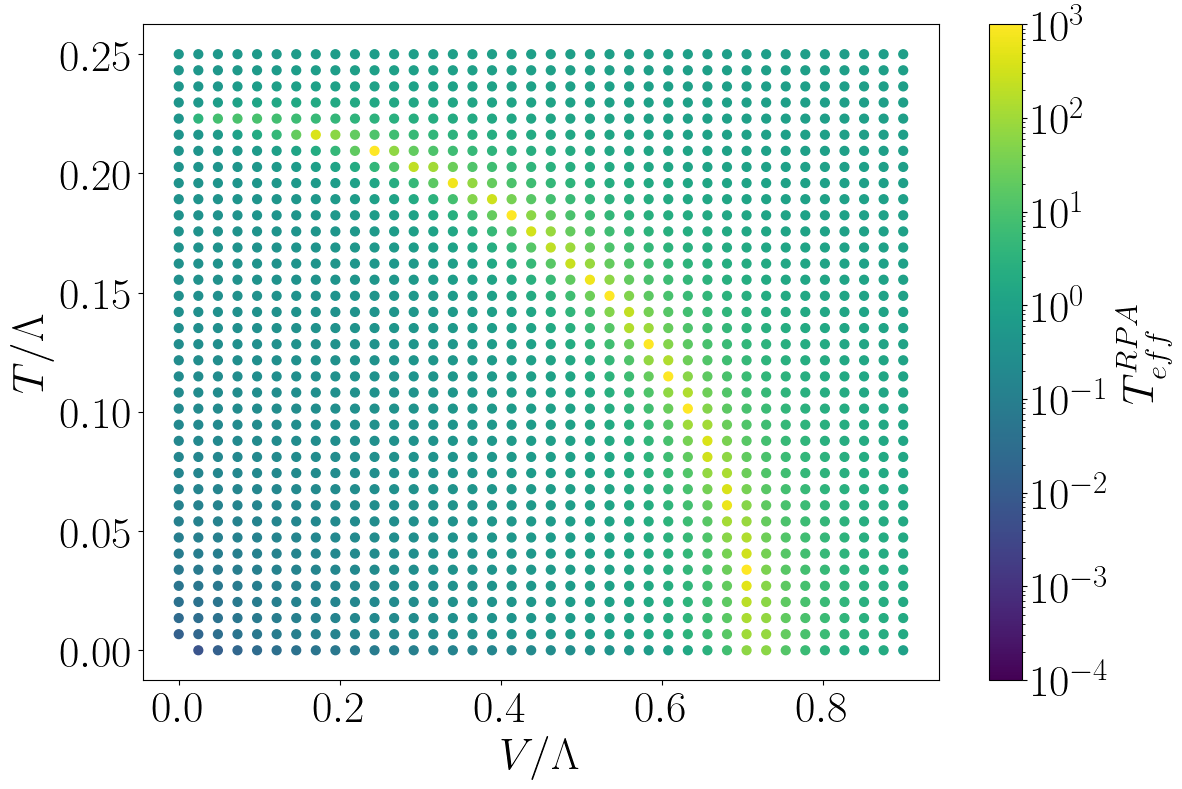

In [8]:

###* Keldysh RPA Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

# TeffRPA = np.abs(0.5/dFomegaTotal/2)
TeffRPA = 0.5/dFomegaTotal[1:]/2
# TeffRPA[TeffRPA < 1e-5] = np.nan

x = voltageSpace
y = TvalueSpace
z = TeffRPA

vmin = 1e-4
vmax = 1e3

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/Teff_RPA_VT.png', bbox_inches='tight', dpi=600)


In [9]:

# ### Equilibrium case
# maskV_check = voltageSpace <= 1e-3

# plt.figure()
# plt.plot(TvalueSpace[maskV_check], TeffRPA[maskV_check], '.')
# plt.plot(TvalueSpace[maskV_check], TvalueSpace[maskV_check], '.')
# print(TeffRPA[maskV_check][:10])


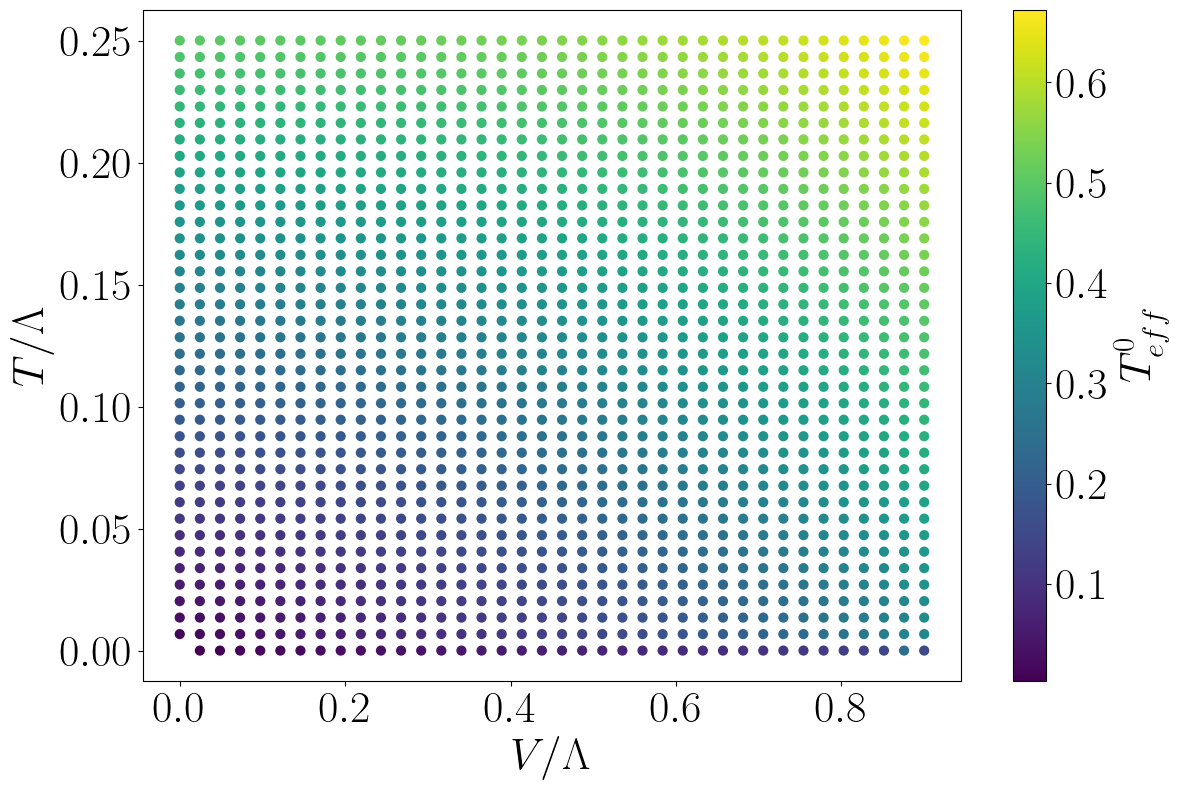

In [10]:

###* Keldysh NonInt Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

TeffNonInt = 0.5/dFomegaNonInt[1:]/2

x = voltageSpace
y = TvalueSpace
z = TeffNonInt


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{0}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/Teff_0_VT.png', bbox_inches='tight', dpi=600)

In [11]:

voltageNewSpace = np.linspace(1e-4, 1.8, 100)
TNewSpace = np.linspace(1e-4, 0.5, 50)
lambdaSamples = np.array([1.0])

phiConstantInit = 0.5
phiLambdaInit = 0.9
couplingValue = 0.7

def computeSaddlePoints(lambdaSamples, Tvalue, voltageSpacePlot, pbar=None):
    
    saddle_points = np.zeros(len(voltageSpacePlot), dtype=float)
    lambdaValue = lambdaSamples[0]
    for i in range(len(voltageSpacePlot)):
        voltageValue = voltageSpacePlot[i]
        result = scipy.optimize.root(MFv2.computeMFLambda, phiConstantInit, args=(lambdaValue, voltageValue, Tvalue, MFv2.Impy, couplingValue), method='lm', tol=1e-6)
        saddle_points[i] = result.x[0]
            
        if pbar is not None:
            pbar.update(1)
    
    return saddle_points


phi_voltage_T = np.zeros((len(TNewSpace), len(voltageNewSpace)), dtype=float)
pbar = tqdm(total=len(TNewSpace)*len(voltageNewSpace), desc='Computing phi(T)')

for i in range(len(TNewSpace)):
    Tvalue = TNewSpace[i]
    phi_voltage_T[i,:] = computeSaddlePoints(lambdaSamples, Tvalue, voltageNewSpace, pbar=pbar)
pbar.close()

Computing phi(T): 100%|██████████| 5000/5000 [02:27<00:00, 33.81it/s]


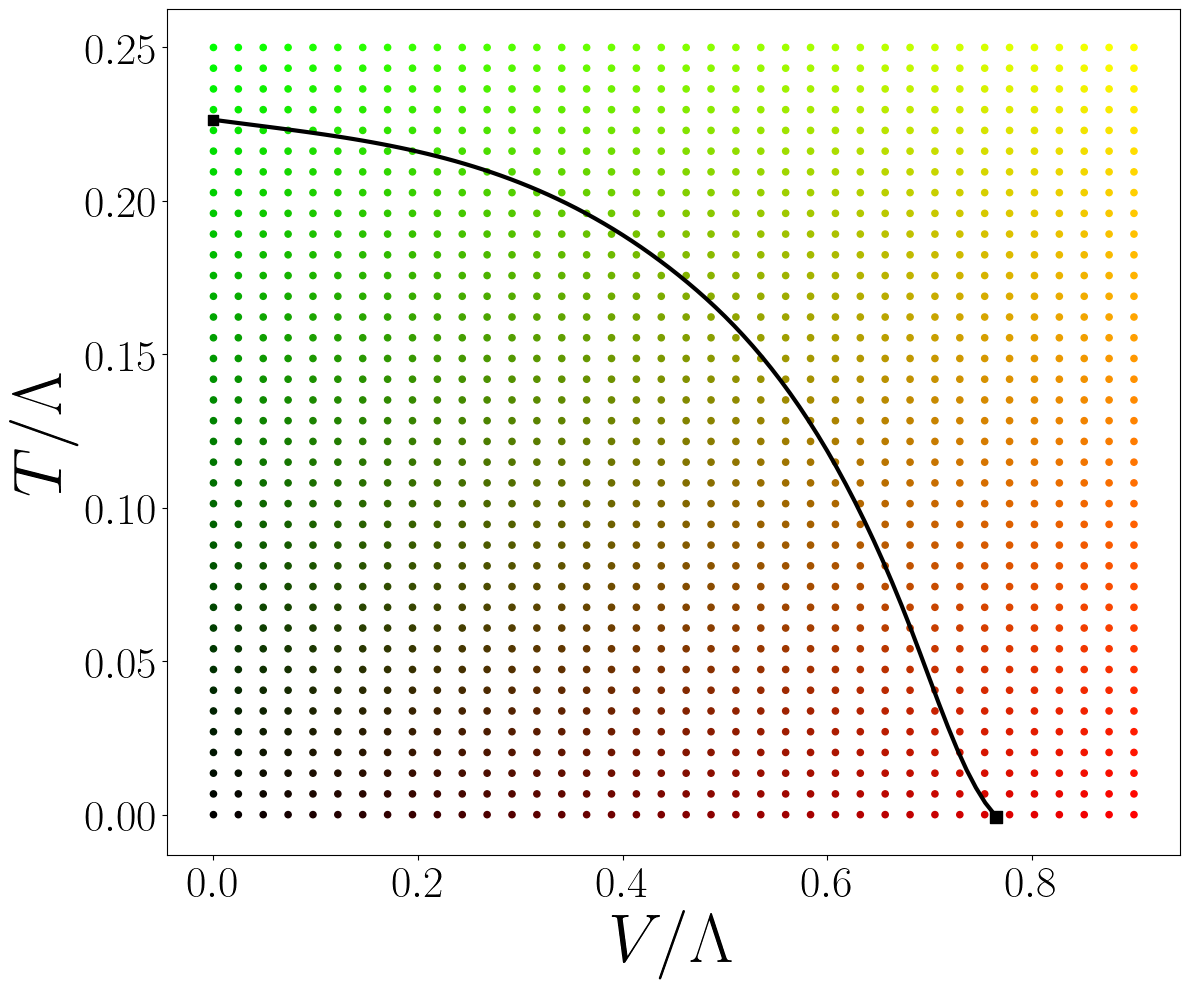

In [12]:

counter = 37

def find_critical_point(x_data, y_data):
    try:
        idx = np.where(y_data > 1e-5)[0]
        x_critical = x_data[idx[-1]+1]
        y_critical = y_data[idx[-1]+1]
    except:
        x_critical = 1e-10
        y_critical = 1e-20
    
    return x_critical, y_critical

T_critical_vec = np.array([find_critical_point(TNewSpace, phi_voltage_T[:, idx])[0] for idx in range(phi_voltage_T.shape[1])])


T_critical_spline = scipy.interpolate.UnivariateSpline(voltageNewSpace, T_critical_vec, s=0.01)
T_critical_spline_vec = np.abs(T_critical_spline(voltageNewSpace))
T_critical_spline_vec[voltageNewSpace > 1.53] = np.nan


n_points_x = 38
n_points_y = 38

x_min, x_max = np.min(voltageNewSpace)/2, np.max(voltageNewSpace)/2
y_min, y_max = np.min(TNewSpace)/2, np.max(TNewSpace)/2


x = np.linspace(x_min, x_max, n_points_x)
y = np.linspace(y_min, y_max, n_points_y)
X, Y = np.meshgrid(x, y)

X_flat = X.flatten()
Y_flat = Y.flatten()

R = (X_flat - x_min) / (x_max - x_min)
G = (Y_flat - y_min) / (y_max - y_min)
B = np.zeros_like(R)

colors = np.stack((R, G, B), axis=1)
colors_mod = colors[counter:]

fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=3.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

ax.scatter(X_flat, Y_flat, color=colors, s=20)

ax.tick_params(axis='y', labelsize=32)
ax.tick_params(axis='x', labelsize=32)

plt.xlabel(r'$V/\Lambda$', fontsize=50)
plt.ylabel(r'$T/\Lambda$', fontsize=50)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/phaseDiagram.png', bbox_inches='tight', dpi=600)

(1444, 3)
(1406,)


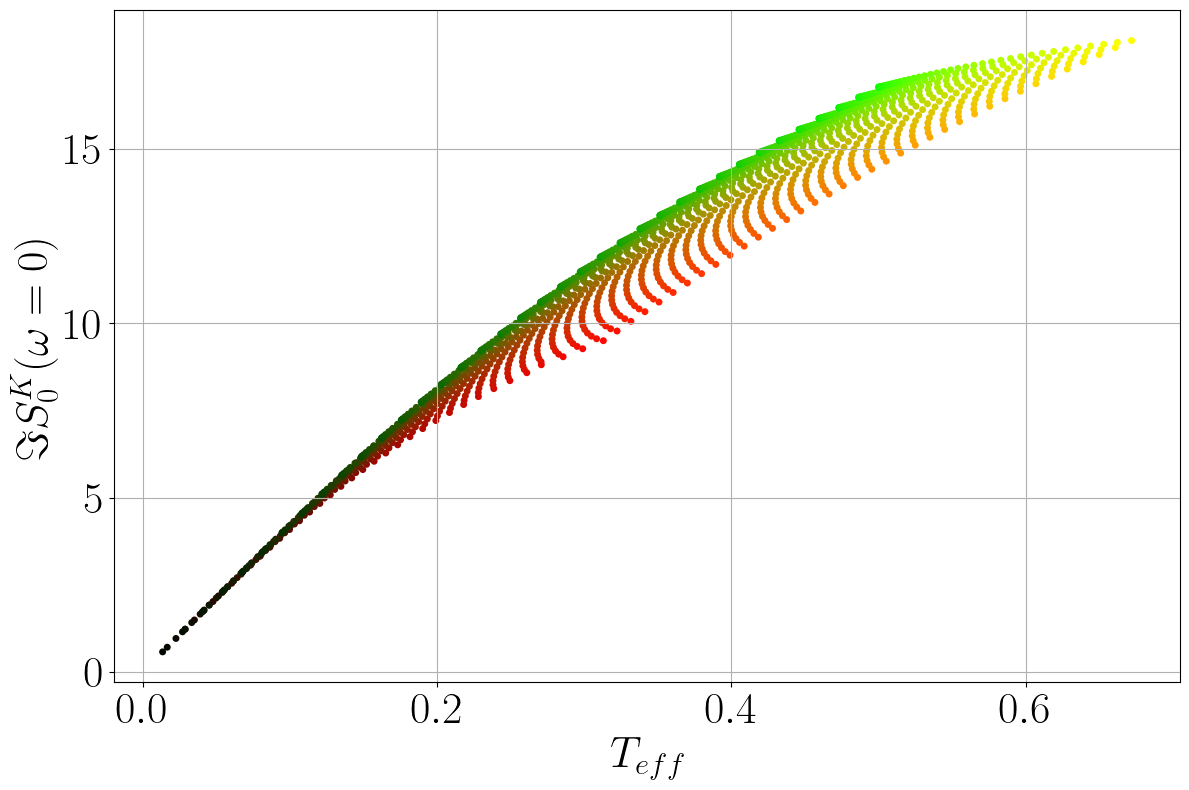

In [13]:
###* put colors to the points 

voltageNewSpace = np.linspace(1e-4, 1.8, 38)
TNewSpace = np.linspace(1e-4, 0.5, 38)

counter = 37

X,Y = np.meshgrid(voltageNewSpace, TNewSpace)
X_flat = X.flatten()
Y_flat = Y.flatten()

x_min = np.min(voltageSpace)
x_max = np.max(voltageSpace)

y_min = np.min(TvalueSpace)
y_max = np.max(TvalueSpace)

R = (X_flat - x_min) / (x_max - x_min)
G = (Y_flat - y_min) / (y_max - y_min)
B = np.zeros_like(R)

colors = np.stack((R, G, B), axis=1)
colors_mod = colors[counter+1:]

print(colors.shape)
print(TeffNonInt[counter:].shape)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = ax.scatter(
    TeffNonInt[counter:],
    keldyshNonIntZero[counter+1:,1].real,
    c=colors_mod,                  # color per-point
    s=100,                     # marker size (optional)
    marker='.',                # point marker (optional)
    edgecolor='none'           # no border
)

ax.tick_params(axis='y', labelsize=32)
ax.tick_params(axis='x', labelsize=32)

plt.xlabel(r'$T_{eff}$', fontsize=32)
plt.ylabel(r'$\Im S^K_{0}(\omega=0)$', fontsize=32)
plt.grid()
plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK0_Teff_VT.png', bbox_inches='tight', dpi=600)

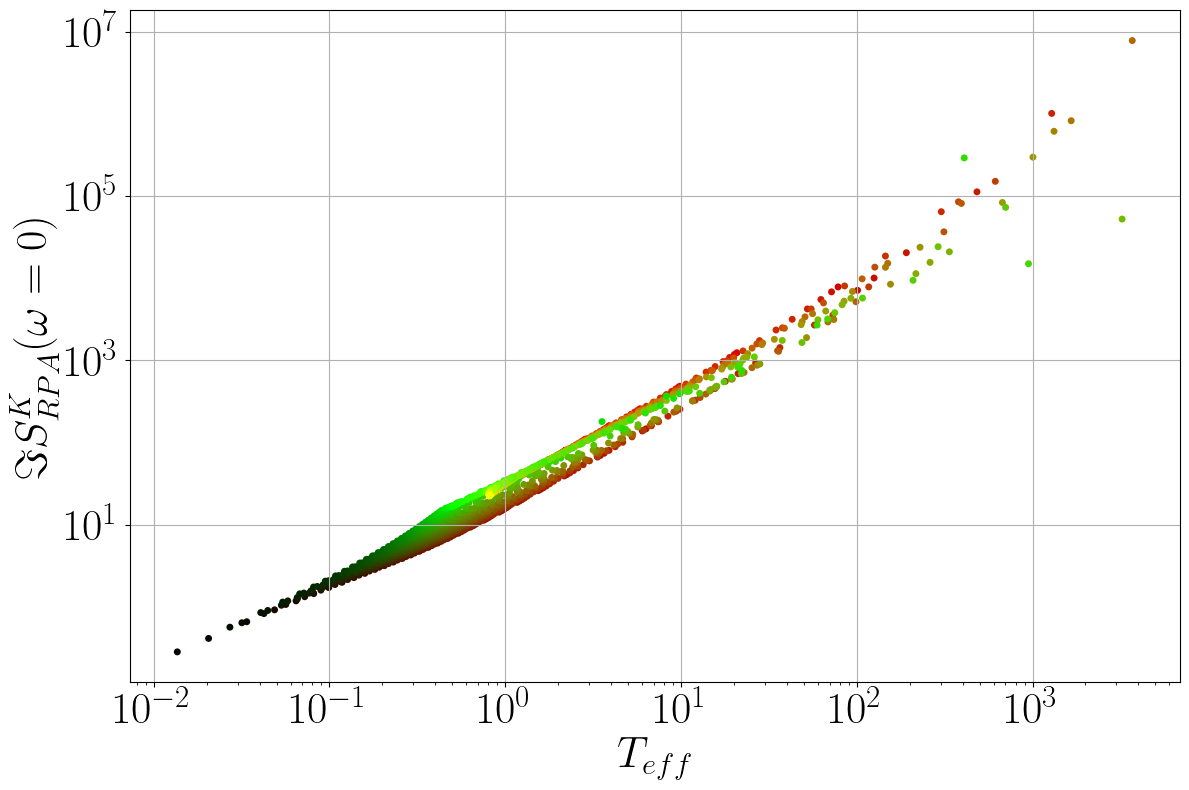

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = ax.scatter(
    TeffRPA[counter:],
    keldyshTotOne[counter+1:,1],
    c=colors_mod,                  # color per-point
    s=100,                     # marker size (optional)
    marker='.',                # point marker (optional)
    edgecolor='none'           # no border
)

ax.tick_params(axis='y', labelsize=32)
ax.tick_params(axis='x', labelsize=32)

plt.xlabel(r'$T_{eff}$', fontsize=32)
plt.ylabel(r'$\Im S^K_{RPA}(\omega=0)$', fontsize=32)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSKRPA_Teff_VT.png', bbox_inches='tight', dpi=600)

In [15]:

#### debuggind:

# counter = 0
# ##! counter = 37

# print(TeffNonInt[counter:].shape)
# print(keldyshNonIntZero[counter+1:,1].real.shape)


# print(TvalueSpace[:counter])
# print(voltageSpace[:counter])

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# sc = ax.scatter(
#     TeffNonInt[counter:],
#     keldyshNonIntZero[counter+1:,1].real,
#     s=100,                     # marker size (optional)
#     marker='.',                # point marker (optional)
#     edgecolor='none'           # no border
# )

# ax.tick_params(axis='y', labelsize=32)
# ax.tick_params(axis='x', labelsize=32)

# plt.xlabel(r'$T_{eff}$', fontsize=32)
# plt.ylabel(r'$\Im S^K_{RPA}(0)$', fontsize=32)
# plt.grid()


(100,)
(100,)


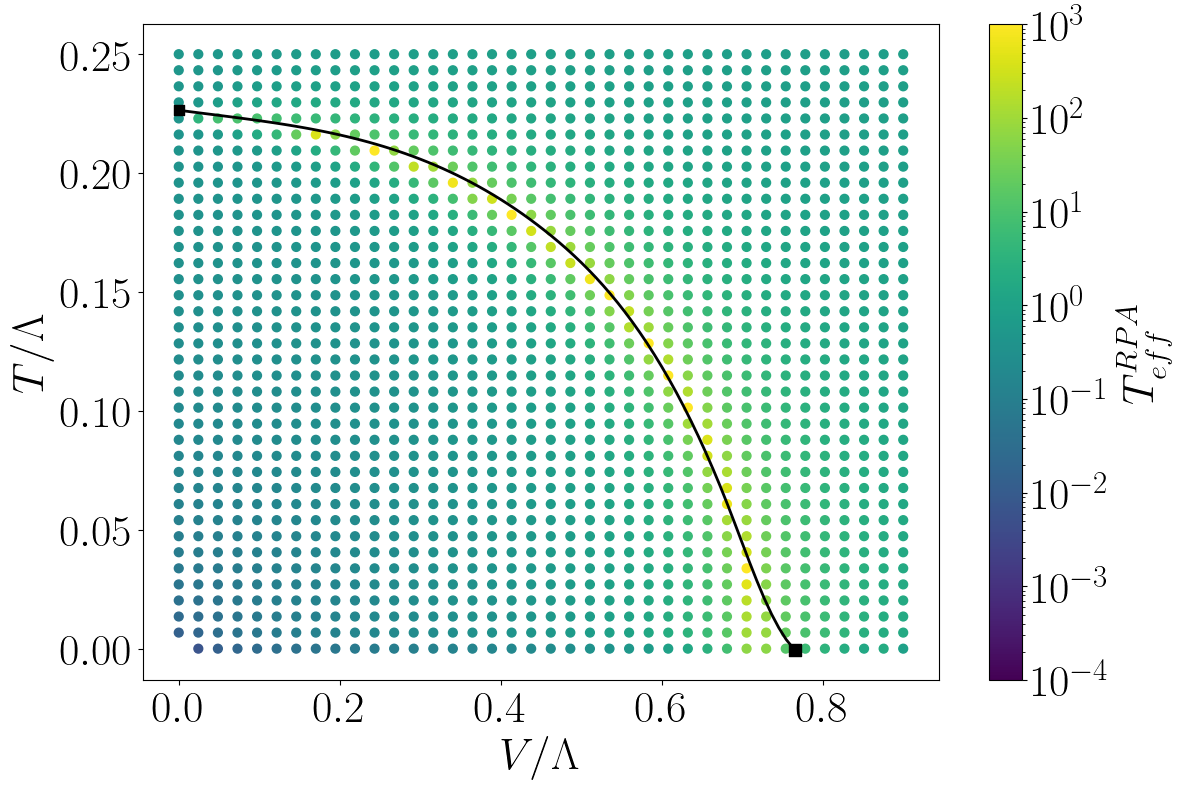

In [16]:

voltageNewSpace = np.linspace(1e-4, 1.8, 100)
TNewSpace = np.linspace(1e-4, 0.5, 50)

###* Keldysh RPA Case


voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

TeffRPA = 0.5/dFomegaTotal[1:]/2

x = voltageSpace
y = TvalueSpace
z = TeffRPA

vmin = 1e-4
vmax = 1e3

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)

print(voltageNewSpace.shape)
print(T_critical_spline_vec.shape)

ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=2.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/Teff_RPA_VT.png', bbox_inches='tight', dpi=600)

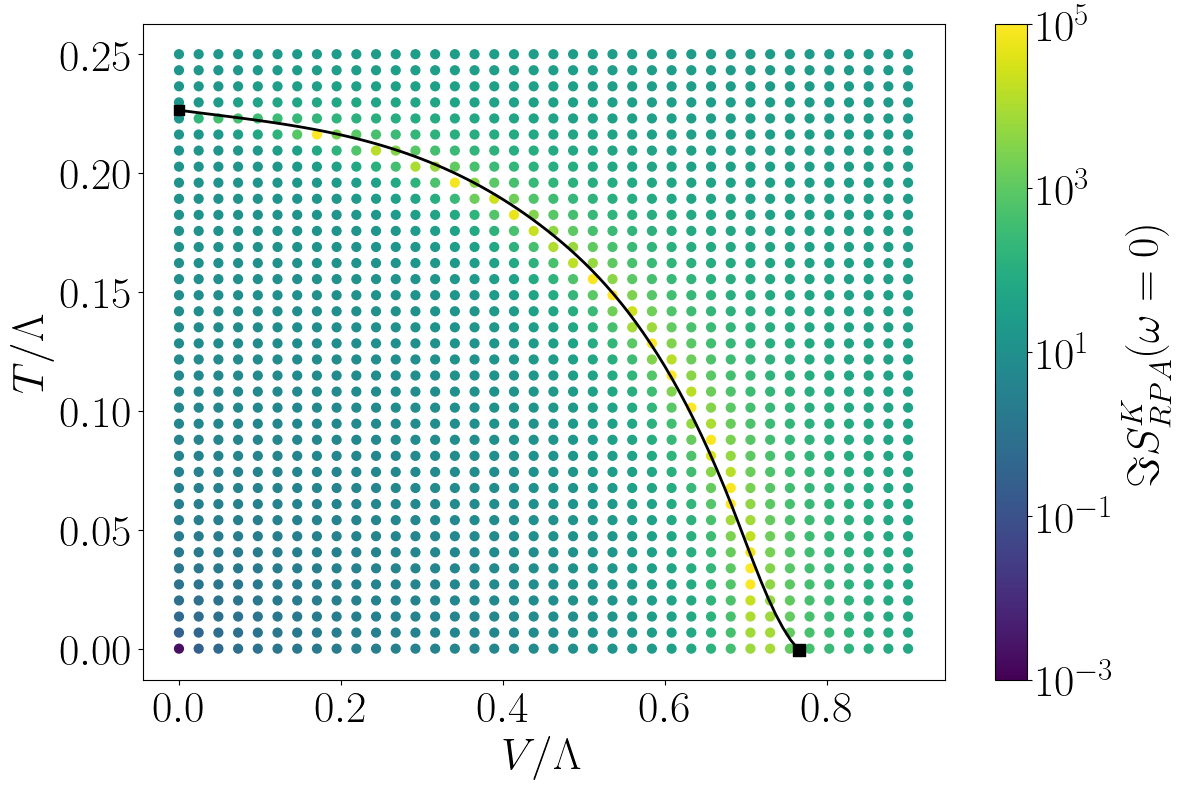

In [17]:

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshTotOne[:, 1]

vmin = 1e-3
vmax = 1e5

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_{RPA}^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)

ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=2.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK_RPA_VT.png', bbox_inches='tight', dpi=600)

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import griddata
# from matplotlib.colors import LogNorm

# # normalize your axes and data
# xx = x/2
# yy = y/2

# # define a regular grid covering your data range
# xi = np.linspace(xx.min(), xx.max(), 300)
# yi = np.linspace(yy.min(), yy.max(), 300)
# XI, YI = np.meshgrid(xi, yi)

# # do a linear interpolation of your scattered z onto the grid
# ZI = griddata(
#     points=(xx, yy),
#     values=z,
#     xi=(XI, YI),
#     method='linear'   # try 'nearest' or 'cubic' if you like
# )

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'

# # plot the interpolated field; mask out any NaNs if outside convex hull
# pcm = ax.pcolormesh(
#     XI, YI, ZI,
#     shading='auto',
#     cmap='viridis',
#     norm=LogNorm(vmin=vmin, vmax=vmax)
# )

# # overlay your critical line & markers
# ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, lw=2, color="black")
# ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", s=60, color="black")
# ax.scatter(1.53/2, T_critical_spline(1.53)/2,    marker="s", s=70, color="black")

# # colorbar & labels
# cbar = fig.colorbar(pcm, ax=ax)
# cbar.set_label(r'$T_{\mathrm{eff}}^{\mathrm{RPA}}$', fontsize=32)
# cbar.ax.tick_params(labelsize=32)
# ax.set_xlabel(r'$V/\Lambda$', fontsize=32)
# ax.set_ylabel(r'$T/\Lambda$', fontsize=32)
# ax.tick_params(labelsize=32)

# plt.tight_layout()
# plt.show()
